# Seaborn Tutorial

 😀
In this notebook, I'm going to talk about Seaborn.
</br>
Happy learning 🐱‍🏍 

## Seaborn vs Matplotlib

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
plt.style.use('classic')

In [6]:
%matplotlib inline

In [7]:
rng = np.random.RandomState(0)

In [8]:
x = np.linspace(0, 10, 250)

In [9]:
y = np.cumsum(rng.randn(250, 6), 0)

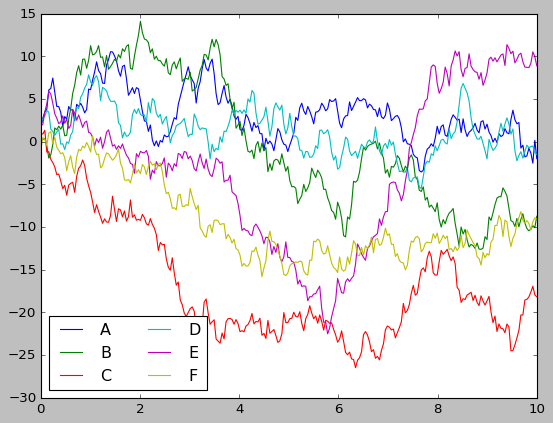

In [10]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='best')

In [11]:
sns.set()

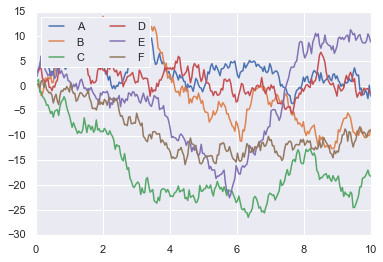

In [10]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

## Exploring Seaborn Plots

In [12]:
iris = sns.load_dataset("iris")

In [13]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
iris.groupby("species").describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

/tmp/ipykernel_9981/918311758.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(versicolor.sepal_length, label="versicolor", shade=True, color="r")
/tmp/ipykernel_9981/918311758.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(virginica.sepal_length, label="virginica", shade=True, color="b")


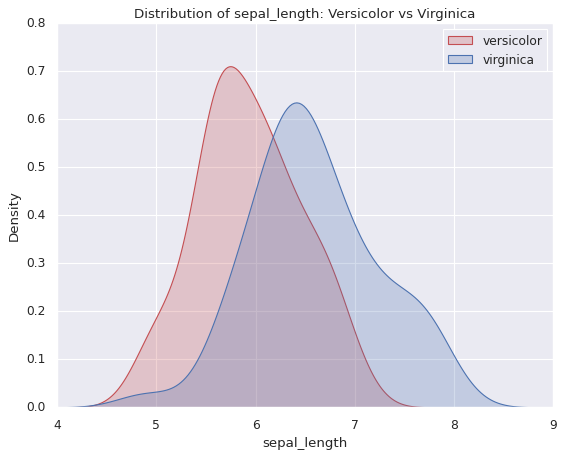

In [ ]:
versicolor = iris.loc[iris.species == "versicolor"]
virginica = iris.loc[iris.species == "virginica"]

sns.kdeplot(versicolor.sepal_length, label="versicolor", shade=True, color="r")
sns.kdeplot(virginica.sepal_length, label="virginica", shade=True, color="b")
plt.title("Distribution of sepal_length: Versicolor vs Virginica")
plt.legend()
plt.show()

/tmp/ipykernel_9981/46966745.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(versicolor.sepal_length, label="versicolor", shade=True, color="r")
/tmp/ipykernel_9981/46966745.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(virginica.sepal_length, label="virginica", shade=True, color="b")
/tmp/ipykernel_9981/46966745.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(setosa.sepal_length, label="setosa", shade=True, color="g")


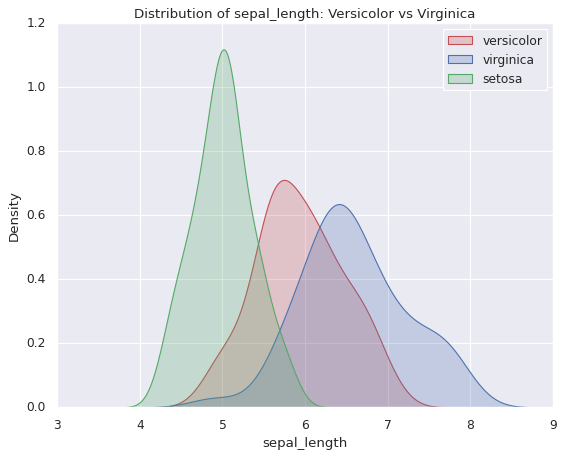

In [50]:
sns.kdeplot(versicolor.sepal_length, label="versicolor", shade=True, color="r")
sns.kdeplot(virginica.sepal_length, label="virginica", shade=True, color="b")
sns.kdeplot(setosa.sepal_length, label="setosa", shade=True, color="g")
plt.title("Distribution of sepal_length: Versicolor vs Virginica")
plt.legend()
plt.show()

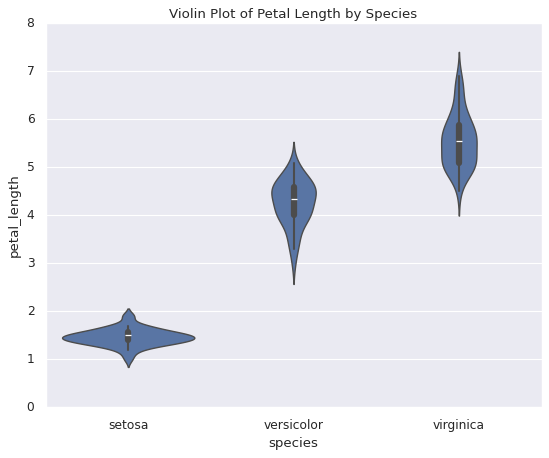

In [21]:
sns.violinplot(x="species", y="petal_length", data=iris)
plt.title("Violin Plot of Petal Length by Species")
plt.show()


In [23]:
setosa=iris.loc[iris.species== "setosa"]
virginica = iris.loc[iris.species == "virginica"]

## Histogram and Density Plots 

<Axes: ylabel='Frequency'>

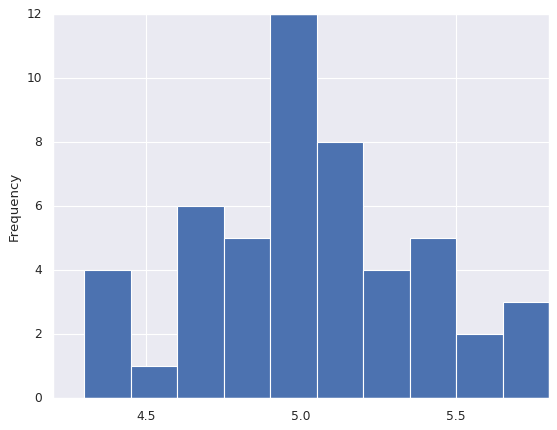

In [24]:
setosa.sepal_length.plot.hist()

<Axes: xlabel='sepal_length', ylabel='Count'>

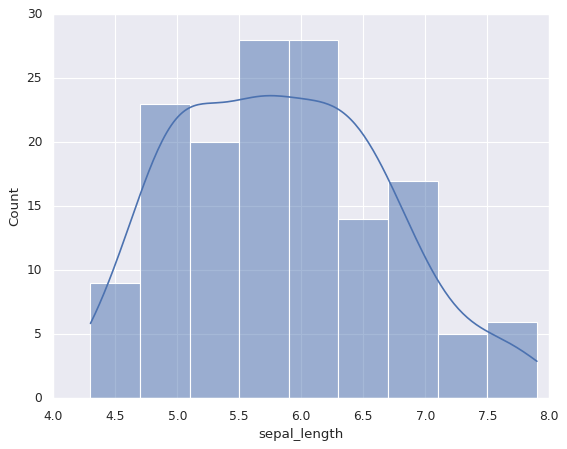

In [26]:
sns.histplot(iris.sepal_length, kde=True)

<Axes: xlabel='sepal_length', ylabel='Count'>

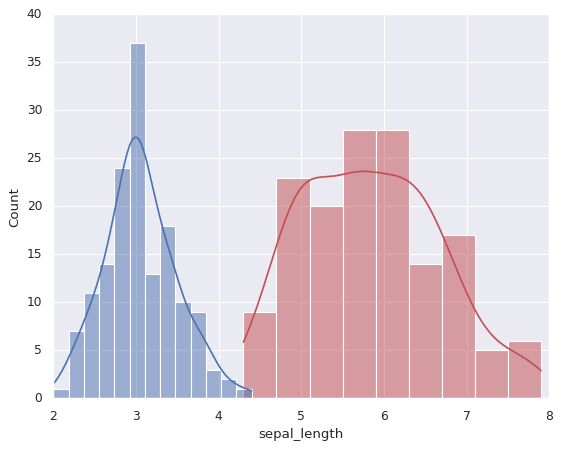

In [27]:
sns.histplot(
    iris.sepal_length, kde=True, color="r")
sns.histplot(
    iris.sepal_width, kde=True,color="b")

## Two-Dimensional Graphics

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

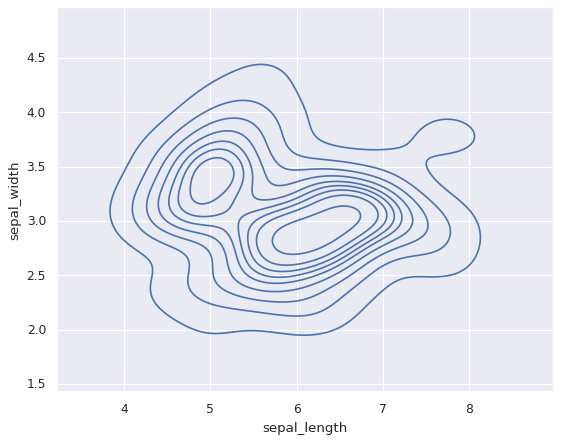

In [28]:
sns.kdeplot(
    data=iris, x="sepal_length", y="sepal_width")

/tmp/ipykernel_9981/2179434913.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

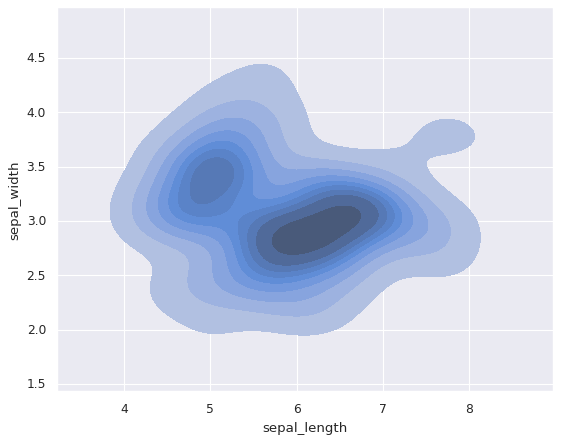

In [29]:
sns.kdeplot(
    data=iris, x="sepal_length", 
    y="sepal_width", shade=True)

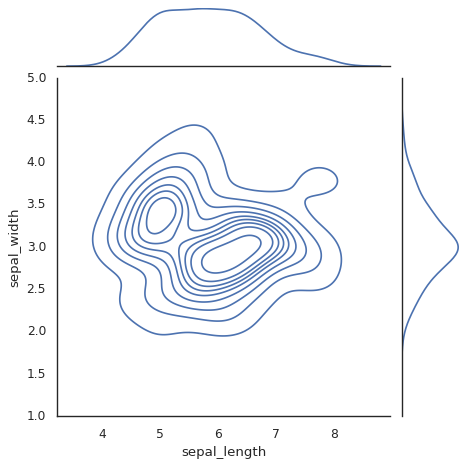

In [30]:
with sns.axes_style('white'):
    sns.jointplot(
        data= iris, x="sepal_length", 
        y="sepal_width", kind='kde')

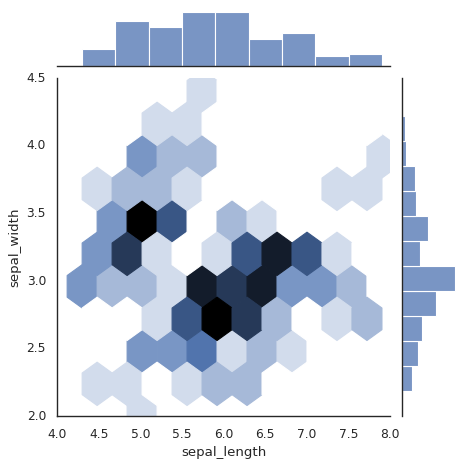

In [31]:
with sns.axes_style('white'):
    sns.jointplot(
        data= iris, x="sepal_length", 
        y="sepal_width", kind='hex')

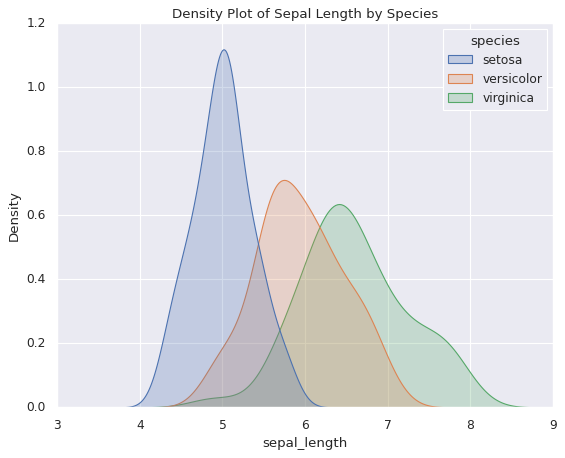

In [37]:
sns.kdeplot(data=iris, x="sepal_length", hue="species", fill=True, common_norm=False)
plt.title("Density Plot of Sepal Length by Species")
plt.show()

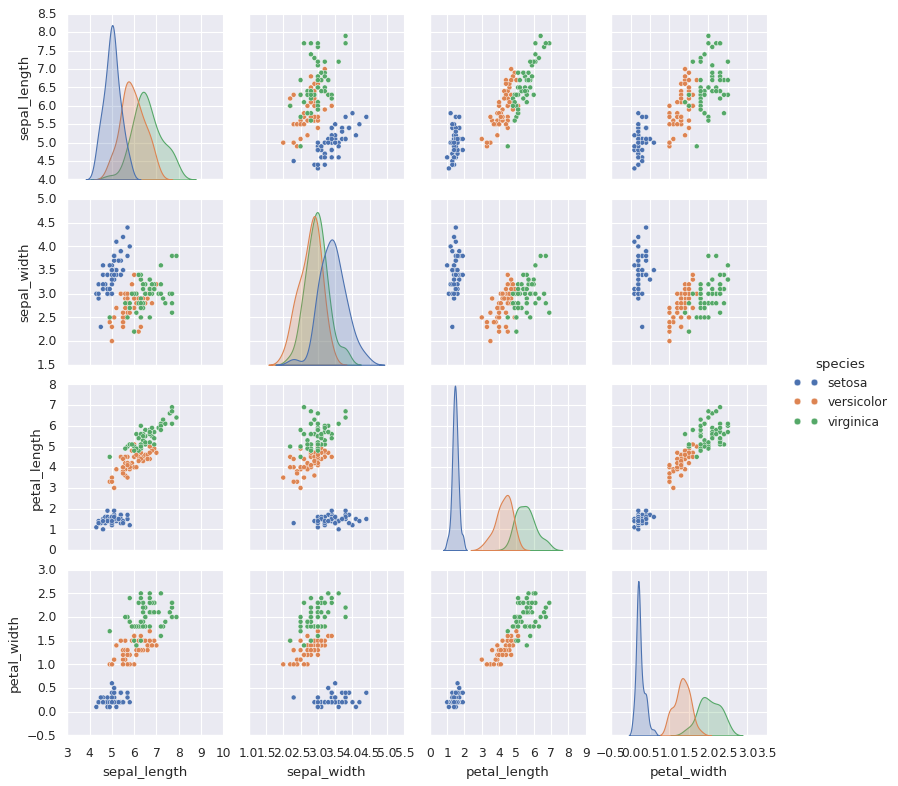

In [32]:
sns.pairplot(iris, hue='species')

In [38]:
tips=sns.load_dataset('tips')

In [39]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [40]:
tips["tip_percent"]=tips[
    "tip"]*100/tips["total_bill"]

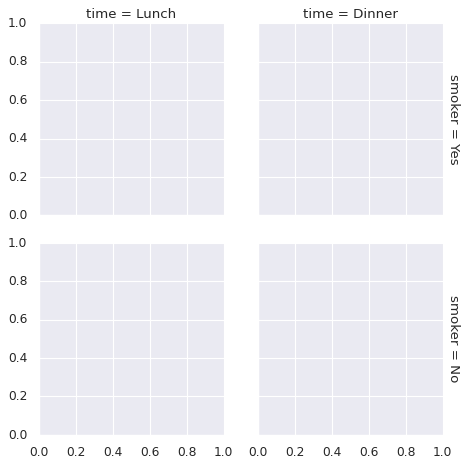

In [41]:
grid=sns.FacetGrid(
    tips, row="smoker",col="time", 
    margin_titles=True)

In [42]:
grid.map(
    plt.hist, "tip_percent", 
    bins=np.linspace(0,40,15))

## Box Plots

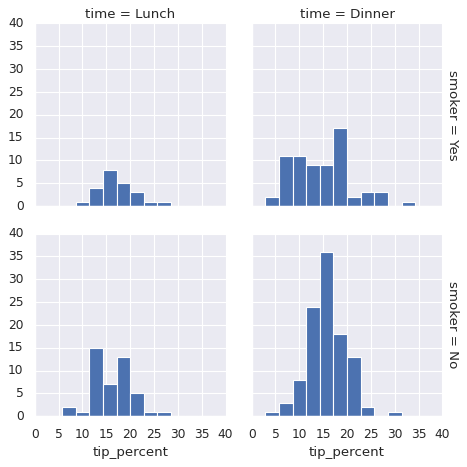

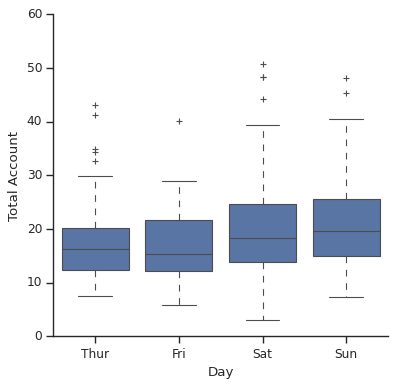

In [43]:
with sns.axes_style(style='ticks'): 
    g = sns.catplot(x="day", y="total_bill", 
                    data=tips, kind="box")
g.set_axis_labels("Day", "Total Account")

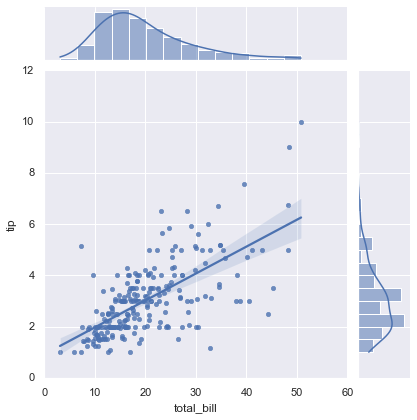

In [29]:
sns.jointplot(x="total_bill", 
              y="tip", 
              data=tips, 
              kind='reg')

## Bar Plots

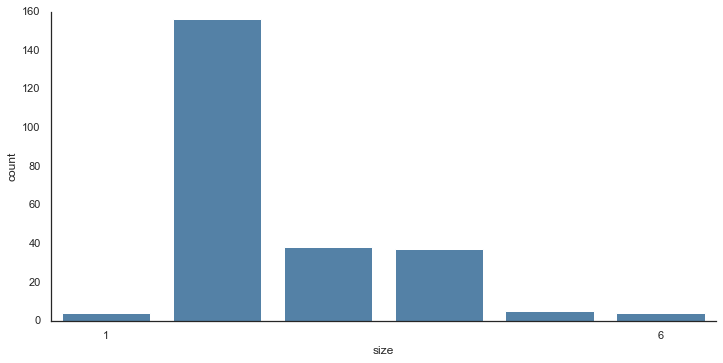

In [30]:
with sns.axes_style('white'):
	g = sns.catplot(x="size", data=tips, 
                    aspect=2,kind="count", color='steelblue') 	
	g.set_xticklabels(step=5)

Don't forget to follow us on [YouTube](http://youtube.com/tirendazacademy) | [Medium](http://tirendazacademy.medium.com) | [Twitter](http://twitter.com/tirendazacademy) | [GitHub](http://github.com/tirendazacademy) | [Linkedin](https://www.linkedin.com/in/tirendaz-academy) | [Kaggle](https://www.kaggle.com/tirendazacademy) 😎